# Homework: Decipherment

## Initial Exploratory Work in Beam Search

The initial work we decided on doing for this assignment would be to implement a successful beam search algorithm. We base it upon the algorithm that is posted on the assignment page:
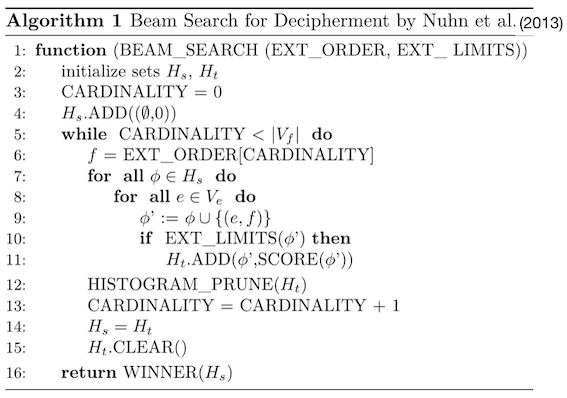
Initial things to be figured out:

1. Data type of Hs and Ht containers
2. Implementation of phi' = phi UNION {(e,f)}
3. Implementation of Histogram Prune 

Initially, exploratory work was done by basing Hs and Ht to be **dictionaries** in Python. However, upon closer examination, we realized that the implementation of a key-value framework may not be suitable for them as they would contain multiple sets that might have very similar keys or directly similar keys. As a result, **this idea was scrapped.** 

Implementation of phi' was also not immediately decided as it depended on what we would have Hs and Ht be (as they are contains of values of phi').

Implementation of Histogram Prune was also something not yet decided before thorough reading on the research paper. At first, it was assumed that we would be keeping EXT_LIMIT sets of values, but it was determined that the algorithm did not function this way.

In [1]:
from collections import defaultdict, Counter
import collections
import pprint
import math
import bz2
pp = pprint.PrettyPrinter(width=45, compact=True)

First let us read in the cipher text from the `data` directory:

In [2]:
def read_file(filename):
    if filename[-4:] == ".bz2":
        with bz2.open(filename, 'rt', encoding='utf-8') as f:
            content = f.read()
            f.close()
    else:
        with open(filename, 'r', encoding='utf-8') as f:
            content = f.read()
            f.close()
    return content

cipher = read_file("data/cipher.txt")
print(cipher)

º∫P/Z/uB∫ÀOR•–X•B
WV+≈GyF∞ºHPπKÇ—y≈
MJy^uIÀΩ—T‘NQyDµ£
S¢/º∑BPORAu∫∆RÃ—E
À^LMZJƒ“\–FHVW≈æy
π+—GDºKI£∞—Xæµ§S¢
RN‘IyEÃOæ—GBTQS∑B
Lƒ/P∑BπX—EHMu^RRÀ
√ZK—–I£W—ÇæµLM“º∑
BPDR+j•∞\N¢≈EuHÀF
Z√–OVWIµ+‘L£Ã^R∞H
IºDR∏Ty“\ƒ≈/πXJQA
PµMæRu‘∫L£NVEKH•G
“IÇJÀµºæLMÃNA£Z¢P
§u–ÀAº∑BVW\+VT‘OP
^•S“Ã∆u≈∞ΩD§G∫∫IM
NÀ£S√E/º∫∫Z∆AP∑BV
–≈X—W—∏F∑æ√+πºAºB
∫OTµRu√+∏ƒy—∏^S—W
VZ≈GyKE∏TyAº∫∑L‘∏
HÇFBXº§XADƒ\ΩLÇ•—
∏≈ƒ∑∑∞≈µPORXQF∫G√
ZπJT‘—∏æJI+“BPQW∞
VEX“ºWI∞—EHM£•uIÀ


## Default Solution

For the default solution we need to compute statistics like length, number of symbols/letters, 
unique occurences, frequencies and relative frequencies of a given file. This is done in the function `get_statistics` below.

While using `get_statistics`, make sure that `cipher=True` is set when the input is a ciphertext.

In [4]:
def get_statistics(content, cipher=True):
    stats = {}
    content = list(content)
    split_content = [x for x in content if x != '\n' and x!=' ']
    length = len(split_content)
    symbols = set(split_content)
    uniq_sym = len(list(symbols))
    freq = collections.Counter(split_content)
    rel_freq = {}
    for sym, frequency in freq.items():
        rel_freq[sym] = (frequency/length)*100
        
    if cipher:
        stats = {'content':split_content, 'length':length, 'vocab':list(symbols), 'vocab_length':uniq_sym, 'frequencies':freq, 'relative_freq':rel_freq}
    else:
        stats = {'length':length, 'vocab':list(symbols), 'vocab_length':uniq_sym, 'frequencies':freq, 'relative_freq':rel_freq}
    return stats

In [5]:
cipher_desc = get_statistics(cipher, cipher=True)
pp.pprint(cipher_desc)
print(list(cipher_desc['frequencies'].most_common(54)))

{'content': ['º', '∫', 'P', '/', 'Z', '/',
             'u', 'B', '∫', 'À', 'O', 'R',
             '•', '–', 'X', '•', 'B', 'W',
             'V', '+', '≈', 'G', 'y', 'F',
             '∞', 'º', 'H', 'P', 'π', 'K',
             'Ç', '—', 'y', '≈', 'M', 'J',
             'y', '^', 'u', 'I', 'À', 'Ω',
             '—', 'T', '‘', 'N', 'Q', 'y',
             'D', 'µ', '£', 'S', '¢', '/',
             'º', '∑', 'B', 'P', 'O', 'R',
             'A', 'u', '∫', '∆', 'R', 'Ã',
             '—', 'E', 'À', '^', 'L', 'M',
             'Z', 'J', 'ƒ', '“', '\\', '–',
             'F', 'H', 'V', 'W', '≈', 'æ',
             'y', 'π', '+', '—', 'G', 'D',
             'º', 'K', 'I', '£', '∞', '—',
             'X', 'æ', 'µ', '§', 'S', '¢',
             'R', 'N', '‘', 'I', 'y', 'E',
             'Ã', 'O', 'æ', '—', 'G', 'B',
             'T', 'Q', 'S', '∑', 'B', 'L',
             'ƒ', '/', 'P', '∑', 'B', 'π',
             'X', '—', 'E', 'H', 'M', 'u',
             '^', 'R', 'R', 'À', '√', 'Z',
          

The default solution matches the frequency of symbols in the cipher text with frequency of letters in the plaintext language (in this case, English). Note that this is just some text in English used to compute letter frequencies. We do not have access to the real plaintext in this homework. 

In order to do compute plaintext frequencies, we use an English dataset has no punctuation or spaces and all characters are lowercase.

In [6]:
# plaintext description
plaintxt = read_file("data/default.wiki.txt.bz2")
plaintxt_desc = get_statistics(plaintxt, cipher=False)
pp.pprint(plaintxt_desc)

{'frequencies': Counter({'e': 1001029,
                         't': 725515,
                         'a': 716871,
                         'i': 609790,
                         'n': 605384,
                         'o': 595295,
                         'r': 547660,
                         's': 544866,
                         'h': 404479,
                         'l': 340389,
                         'd': 339004,
                         'c': 271811,
                         'u': 215523,
                         'm': 214359,
                         'f': 184661,
                         'g': 168439,
                         'p': 166824,
                         'w': 142745,
                         'b': 130070,
                         'y': 126667,
                         'v': 86098,
                         'k': 56452,
                         'j': 18131,
                         'x': 15796,
                         'z': 9903,
                         'q': 7356}),
 'length': 824511

## Initial Exploratory Work in Beam Search

The initial work we decided on doing for this assignment would be to implement a successful beam search algorithm. We base it upon the algorithm that is posted on the assignment page:
![image.png](attachment:image.png)

Initial things to be figured out:

1. Data type of Hs and Ht containers
2. Implementation of phi' = phi UNION {(e,f)}
3. Implementation of Histogram Prune 

Initially, exploratory work was done by basing Hs and Ht to be **dictionaries** in Python. However, upon closer examination, we realized that the implementation of a key-value framework may not be suitable for them as they would contain multiple sets that might have very similar keys or directly similar keys. As a result, **this idea was scrapped.**

Implementation of phi' was also not immediately decided as it depended on what we would have Hs and Ht be (as they are contains of values of phi'). 

Implementation of Histogram Prune was also something not yet decided before thorough reading on the research paper. At first, it was assumed that we would be keeping EXT_LIMIT sets of values, but it was determined that the algorithm did not function this way.

In [7]:
import ngram
LM = ngram.LM("data/6-gram-wiki-char.lm.bz2", n=6, verbose=False)

Reading language model from data/6-gram-wiki-char.lm.bz2...
Done.


In [ ]:
import string
import math
import copy
cipher = read_file("data/cipher.txt")
def heuristic(map_to_score, new_char, union_phi, current_score):
    return score_map(map_to_score)


def beam_search(ext_order, ext_limits_func, cipher, union_phi_func, score_func, prune_beam_size = 10000):
    Hs = list()
    Ht = list()
    V = string.ascii_lowercase[:]
    cardinality = 0
    Hs.append((dict(), -math.inf))
    cipher_desc = get_statistics(cipher, cipher=True)
    while cardinality < cipher_desc['vocab_length']:
        print("cardinality is {0}".format(cardinality))
        f = ext_order[cardinality]
        for phi in Hs:
            for e in V:
                #print("phi handling is {0} with score {1}".format(phi[0], phi[1]))
                new_phi = union_phi_func(phi[0], (f,e))
                #print("new phi is {0}".format(new_phi))
                if ext_limits_func(new_phi):
                    Ht.append((new_phi,score_func(new_phi)))
        Hs = sorted(Ht, key=lambda tup:tup[1])[:prune_beam_size]
        #print("first one is ", Hs[0], "last one is ", Hs[-1])
        cardinality += 1
        Ht = list()
    best_score = -math.inf
    best_phi = Hs[0][0]
    for phi, score in Hs:
        if best_score < score:
            best_score = score
            best_phi = phi
    return best_phi

def get_ext_order(cipher):
    cipher_desc = get_statistics(cipher, cipher=True)
    list_of_letters = list(map(lambda c : c[0], list(cipher_desc['frequencies'].most_common(54))))
    return list_of_letters

def ext_limits_func(phi):
    limit = 3
    #print("new phi is ", phi)
    return Counter(phi.values()).most_common(1)[0][1] <= limit

def union_phi_func(phi, new_fix):
    new_phi = copy.deepcopy(phi)
    if new_fix[0] in phi.keys():
        new_phi[new_fix[0]] += new_fix[1]
    else:
        new_phi[new_fix[0]] = new_fix[1]
    return new_phi

def score_map(map_to_score):
    text_to_score = cipher
    bit_string_span = ""
    for i, each_char in enumerate(text_to_score):
        if each_char not in map_to_score.keys():
            bit_string_span += '.'
        else:
            bit_string_span += 'o'
            #print("replacing {0} with {1} at index {2}".format(each_char, map_to_score[each_char], i))
            text_to_score = text_to_score[:i] + map_to_score[each_char] + text_to_score[i + 1:]
    #print("span is {0}".format(bit_string_span[:50]))
    #print("text to score is ", text_to_score[:50])
    #print("score is ",LM.score_bitstring(cipher, bit_string_span))
    #print("bit_string_span is {}".format(bit_string_span))
    return LM.score_bitstring(cipher, bit_string_span)

print("text to decode is {0}".format(cipher))
found_mapping = beam_search(get_ext_order(cipher), ext_limits_func, cipher, union_phi_func, score_map)
#phi = {'B':'b'} bcadea
#print(Counter(phi.keys()).most_common(1)[0][0])
#ext_limits_func(phi)
#new_phi = union_phi_func(phi, ('B', 'c'))
print(found_mapping)
decoded = ""
for each in cipher_desc['content']:
    decoded += found_mapping[each]
print("decoded text is:", decoded)

                

In [ ]:
decoded = 'IlikekillingpeoplebecauseitissomuchfunitismorefunthankillingwildgameintheforestbecausemanisthemostdangerousanimalofalltokillsomethinggivesmethemostthrillingexperienceitisevenbetterthangettingyourrocksoffwithagirlthebestpartofitisthatwhenIdieIwillbereborninparadiseandallthepeopleIhavekilledwillbecomemyslavesIwillnotgiveyoumynamebecauseyouwilltrytoslowdownorstopmycollectingofslavesformyafterlife'
print(len(decoded))
print(LM.score_seq(cipher))